## Importing Libraries

In [ ]:
# Essential libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import InputLayer, Dense, Dropout,BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam

## Importing the dateset

In [ ]:
data = pd.read_csv('/content/MCSDatasetNEXTCONLab.csv')
data.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [ ]:
# Splitting the dataset into inputs and outputs
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x

array([[ 1.00000000e+00,  4.54421419e+01, -7.53033693e+01, ...,
         9.10000000e+01,  0.00000000e+00,  1.31380000e+05],
       [ 1.00000000e+00,  4.54421541e+01, -7.53043661e+01, ...,
         9.10000000e+01,  0.00000000e+00,  1.31380000e+05],
       [ 1.00000000e+00,  4.54421041e+01, -7.53039633e+01, ...,
         9.10000000e+01,  0.00000000e+00,  1.21996000e+05],
       ...,
       [ 4.00000000e+03,  4.54366819e+01, -7.51524163e+01, ...,
         6.30000000e+01,  0.00000000e+00,  1.22015000e+05],
       [ 4.00000000e+03,  4.54369777e+01, -7.51532778e+01, ...,
         6.30000000e+01,  0.00000000e+00,  1.22015000e+05],
       [ 4.00000000e+03,  4.54369829e+01, -7.51532401e+01, ...,
         6.30000000e+01,  0.00000000e+00,  1.22015000e+05]])

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

##Splitting dataset into train and test sets

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print(x_train)
print(x_test),
print(y_train)
print(y_test)

[[ 1.71000000e+02  4.54643174e+01 -7.52088358e+01 ...  8.00000000e+01
   1.00000000e+00  1.68928000e+05]
 [ 2.33500000e+03  4.55283185e+01 -7.51242916e+01 ...  5.50000000e+01
   0.00000000e+00  2.72162000e+05]
 [ 1.25700000e+03  4.54930959e+01 -7.52199227e+01 ...  5.70000000e+01
   0.00000000e+00  2.15847000e+05]
 ...
 [ 2.73800000e+03  4.54682185e+01 -7.52736848e+01 ...  6.10000000e+01
   0.00000000e+00  1.68920000e+05]
 [ 2.99600000e+03  4.54448243e+01 -7.52308821e+01 ...  4.40000000e+01
   0.00000000e+00  1.31389000e+05]
 [ 7.44000000e+02  4.55425901e+01 -7.51854975e+01 ...  8.80000000e+01
   0.00000000e+00  3.00307000e+05]]
[[ 3.64600000e+03  4.55401162e+01 -7.51799010e+01 ...  6.50000000e+01
   0.00000000e+00  3.00308000e+05]
 [ 3.60200000e+03  4.55174092e+01 -7.53040321e+01 ...  6.20000000e+01
   0.00000000e+00  2.53372000e+05]
 [ 3.86000000e+03  4.55070362e+01 -7.52475136e+01 ...  7.90000000e+01
   0.00000000e+00  2.34611000e+05]
 ...
 [ 4.50000000e+02  4.55517722e+01 -7.5277353

# Scaling

In [ ]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modeling

In [ ]:
# Building function contains all classic machine learning model
def model(x_train,y_train,x_test):
  #Random Forest
  RF = RandomForestClassifier(n_estimators=100,random_state =0)
  RF.fit(x_train,y_train)
  y_pred_RF = RF.predict(x_test)

  # Naive bayes
  NB = GaussianNB()
  NB.fit(x_train,y_train)
  y_pred_NB = NB.predict(x_test)

  #Adaboost
  Adaboost = AdaBoostClassifier(n_estimators = 100, random_state = 0)
  Adaboost.fit(x_train,y_train)
  y_pred_Adaboost = Adaboost.predict(x_test)

  return y_pred_RF, y_pred_NB, y_pred_Adaboost,RF,NB,Adaboost

In [ ]:
y_pred_RF, y_pred_NB,y_pred_Adaboost,RF,NB,Adaboost = model(x_train,y_train,x_test)

# Evaluation

In [ ]:
# Building function contain all evaluation techniques we used in this project
def accuracy (y_test,y_pred):
  cr = classification_report(y_test,y_pred)
  acc = accuracy_score(y_test,y_pred)
  print(cr)
  return acc

1. Random Forest

In [ ]:
accuracy(y_test,y_pred_RF)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       390
           1       1.00      1.00      1.00      2507

    accuracy                           1.00      2897
   macro avg       1.00      0.99      0.99      2897
weighted avg       1.00      1.00      1.00      2897



0.9968933379357956

2. Naive Bayes

In [ ]:
accuracy(y_test,y_pred_NB)

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       390
           1       0.91      0.92      0.91      2507

    accuracy                           0.85      2897
   macro avg       0.67      0.66      0.66      2897
weighted avg       0.84      0.85      0.85      2897



0.8498446668967898

3. Adaboost 

In [ ]:
accuracy(y_test,y_pred_Adaboost)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       390
           1       0.98      0.99      0.98      2507

    accuracy                           0.97      2897
   macro avg       0.95      0.91      0.93      2897
weighted avg       0.97      0.97      0.97      2897



0.9678978253365551

# Final decision method 1

In [ ]:
all_models = {'RF':y_pred_RF,'NB':y_pred_NB,'Adaboost':y_pred_Adaboost}
df = pd.DataFrame(all_models)
Aggregator = df.sum(axis=1)
final_decision = []
for i in Aggregator:
  if i >= 2:
    final_decision.append(1)
  else:
    final_decision.append(0)
final_decision

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [ ]:
# def voting(x_train,y_train,x_test,RF,NB,Adaboost):
#   model(x_train,y_train,x_test)
#   voting = VotingClassifier(estimators=[('RF',RF),('NB',NB),('Adaboost',Adaboost)], voting = 'hard')
#   voting.fit(x_train,y_train)
#   final_decision = voting.predict(x_test)
#   return final_decision

In [ ]:
# final_decision = voting(x_train,y_train,x_test,RF,NB,Adaboost)
# final_decision

# Final decision method 2

In [ ]:
y_RF = RF.predict(x_train)
y_NB = NB.predict(x_train)
y_Adaboost = Adaboost.predict(x_train)
X = accuracy(y_train,y_RF)
Y = accuracy(y_train,y_Adaboost)
Z = accuracy(y_train,y_NB)
W_RF = X/(X+Y+Z)
W_Adaboost = Y/(X+Y+Z)
W_NB = Z/(X+Y+Z)
Aggregated_output = y_pred_RF * W_RF + y_pred_NB * W_NB + y_pred_Adaboost * W_Adaboost
print(Aggregated_output)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1507
           1       1.00      1.00      1.00     10080

    accuracy                           1.00     11587
   macro avg       1.00      1.00      1.00     11587
weighted avg       1.00      1.00      1.00     11587

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1507
           1       0.98      0.99      0.98     10080

    accuracy                           0.97     11587
   macro avg       0.95      0.93      0.94     11587
weighted avg       0.97      0.97      0.97     11587

              precision    recall  f1-score   support

           0       0.45      0.42      0.44      1507
           1       0.91      0.92      0.92     10080

    accuracy                           0.86     11587
   macro avg       0.68      0.67      0.68     11587
weighted avg       0.85      0.86      0.86     11587

[1.         1.     

In [ ]:
final_decision_2 = []
for i in Aggregated_output:
  if i > 0.5 :
    final_decision_2.append(1)
  else:
    final_decision_2.append(0)

In [ ]:
final_decision_2

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


# Comparision

In [ ]:
Ensemble_vote = accuracy(y_test,final_decision)
Ensemble_wieghted = accuracy(y_test,final_decision_2)
acc_RF = accuracy(y_test,y_pred_RF)
acc_NB = accuracy(y_test,y_pred_NB)
acc_Adaboost = accuracy(y_test,y_pred_Adaboost)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       390
           1       0.97      1.00      0.99      2507

    accuracy                           0.97      2897
   macro avg       0.97      0.91      0.94      2897
weighted avg       0.97      0.97      0.97      2897

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       390
           1       0.97      1.00      0.99      2507

    accuracy                           0.97      2897
   macro avg       0.97      0.91      0.94      2897
weighted avg       0.97      0.97      0.97      2897

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       390
           1       1.00      1.00      1.00      2507

    accuracy                           1.00      2897
   macro avg       1.00      0.99      0.99      2897
weighted avg       1.00      1.00      1.00      2897

              preci

# Visualization

(0.8, 1.0)

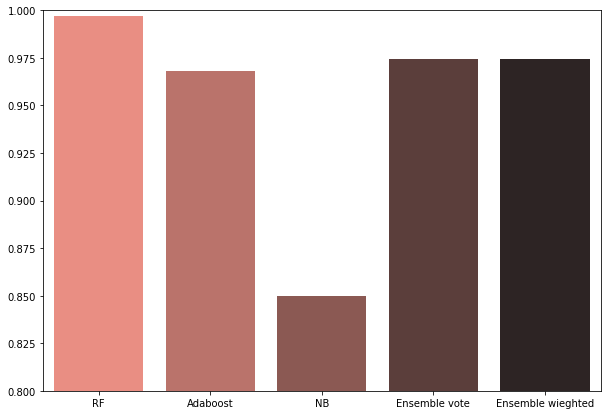

In [ ]:
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(10,7)
sns.barplot(x=['RF','Adaboost','NB','Ensemble vote','Ensemble wieghted'], y = [acc_RF,acc_Adaboost,acc_NB,Ensemble_vote,Ensemble_wieghted],palette='dark:salmon_r')
plt.ylim(0.8,1)

# GAN

## Constant variables

In [ ]:
batch_size = 64
num_channels = 12
num_classes = 2
latent_dim = 128

## Prepare the training data


In [ ]:
y_train_new = keras.utils.to_categorical(y_train, 2)
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train_new))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training images: {x_train.shape}")
print(f"Shape of training labels: {y_train_new.shape}")

Shape of training images: (11587, 12)
Shape of training labels: (11587, 2)


In [ ]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes
print(generator_in_channels, discriminator_in_channels)

130 14


## Building Generator and Discriminator models

In [ ]:
# Create the discriminator.
discriminator = Sequential(
    [
        Dense(512,input_dim = discriminator_in_channels),
        LeakyReLU(alpha=0.2),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dropout(0.4),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ],
    name="discriminator"
)

# Create the generator.
generator = Sequential(
    [
        Dense(256,input_dim = generator_in_channels),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(12)],
    name="generator"
)

## Conditional GAN

In [ ]:
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(ConditionalGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ConditionalGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_tasks, one_hot_labels = data

        # Add dummy dimensions to the labels so that they can be concatenated with the tasks. This is for the discriminator.
        task_one_hot_labels = one_hot_labels[:, :, None, None]
        task_one_hot_labels = tf.reshape(task_one_hot_labels, (-1, num_classes))


        # Sample random points in the latent space and concatenate the labels. This is for the generator.
        batch_size = tf.shape(real_tasks)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat([random_latent_vectors, one_hot_labels], axis=1)

        # Decode the noise (guided by labels) to fake tasks.
        generated_tasks = self.generator(random_vector_labels)

        # Combine them with real tasks. Note that we are concatenating the labels with these tasks here.
        real_tasks = tf.cast(real_tasks, tf.float32)
        fake_task_and_labels = tf.concat([generated_tasks, task_one_hot_labels], -1)
        real_task_and_labels = tf.concat([real_tasks, task_one_hot_labels], -1)
        combined_tasks = tf.concat([fake_task_and_labels, real_task_and_labels], axis=0)

        # Assemble labels discriminating real from fake tasks.
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)

        # Train the discriminator.
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_tasks)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Sample random points in the latent space.
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        random_vector_labels = tf.concat([random_latent_vectors, one_hot_labels], axis=1)

        # Assemble labels that say "all real images".
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights of the discriminator)!
        with tf.GradientTape() as tape:
            fake_tasks = self.generator(random_vector_labels)
            fake_task_and_labels = tf.concat([fake_tasks, task_one_hot_labels], -1)
            predictions = self.discriminator(fake_task_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

In [ ]:
cond_gan = ConditionalGAN(
    discriminator=discriminator, generator=generator, latent_dim=latent_dim
)
cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

cond_gan.fit(dataset, epochs=20)


Epoch 1/20
182/182 [==============================] - 9s 36ms/step - g_loss: 1.3895 - d_loss: 0.6644
Epoch 2/20
182/182 [==============================] - 7s 37ms/step - g_loss: 0.7756 - d_loss: 0.7241
Epoch 3/20
182/182 [==============================] - 7s 36ms/step - g_loss: 0.7446 - d_loss: 0.6976
Epoch 4/20
182/182 [==============================] - 7s 36ms/step - g_loss: 0.6853 - d_loss: 0.7063
Epoch 5/20
182/182 [==============================] - 7s 36ms/step - g_loss: 0.6917 - d_loss: 0.7122
Epoch 6/20
182/182 [==============================] - 7s 37ms/step - g_loss: 0.7326 - d_loss: 0.7177
Epoch 7/20
182/182 [==============================] - 7s 36ms/step - g_loss: 0.7273 - d_loss: 0.6952
Epoch 8/20
182/182 [==============================] - 7s 36ms/step - g_loss: 0.7183 - d_loss: 0.7016
Epoch 9/20
182/182 [==============================] - 7s 36ms/step - g_loss: 0.8398 - d_loss: 0.7296
Epoch 10/20
182/182 [==============================] - 7s 37ms/step - g_loss: 0.7943 - d_lo

# Generate fake task  via generator network

In [ ]:
# We first extract the trained generator from our Conditional GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate tasks that would be generated
num_interpolation = 2000  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = tf.random.normal(shape=(1, latent_dim))
interpolation_noise = tf.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = tf.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(class1):
    # Convert the start label to one-hot encoded vectors.
    first_label = keras.utils.to_categorical([class1]*num_interpolation, num_classes)
    
    # Combine the noise and the labels and run inference with the generator.
    noise_and_labels = tf.concat([interpolation_noise, first_label], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake


class1 = 1 

fake_tasks = interpolate_class(class1)

# Mix fake task with the original test dataset





In [ ]:
x_test_new = np.concatenate((x_test,fake_tasks),axis = 0)
x_test_new

array([[ 0.91147787,  0.79765584,  0.62859103, ...,  0.5       ,
         0.        ,  0.79999094],
       [ 0.90047512,  0.6936453 ,  0.12188244, ...,  0.45714286,
         0.        ,  0.67495598],
       [ 0.96499125,  0.64613102,  0.35259348, ...,  0.7       ,
         0.        ,  0.62497769],
       ...,
       [ 1.19679046,  0.72414821,  0.78746676, ..., -0.57519746,
         0.47345996,  0.52010113],
       [ 1.19679046,  0.72414821,  0.78746676, ..., -0.57519746,
         0.47345996,  0.52010113],
       [ 1.19679046,  0.72414821,  0.78746676, ..., -0.57519746,
         0.47345996,  0.52010113]])

In [ ]:
fake_task_label = np.zeros(num_interpolation)
y_test_new = np.concatenate((y_test,fake_task_label),axis = 0)
y_test_new

array([1., 1., 1., ..., 0., 0., 0.])

# Train the machine learning models with new test set

In [ ]:
y_pred_RF_new, y_pred_NB_new, y_pred_Adaboost_new,RF_new,NB_new,Adaboost_new =  model(x_train,y_train,x_test_new)

In [ ]:
acc_RF_new = accuracy(y_test_new,y_pred_RF_new)

              precision    recall  f1-score   support

         0.0       1.00      0.16      0.28      2390
         1.0       0.56      1.00      0.71      2507

    accuracy                           0.59      4897
   macro avg       0.78      0.58      0.49      4897
weighted avg       0.77      0.59      0.50      4897



In [ ]:
acc_Adaboost_new = accuracy(y_test_new,y_pred_Adaboost_new)

              precision    recall  f1-score   support

         0.0       0.95      0.23      0.37      2390
         1.0       0.57      0.99      0.73      2507

    accuracy                           0.62      4897
   macro avg       0.76      0.61      0.55      4897
weighted avg       0.76      0.62      0.55      4897



In [ ]:
acc_NB_new = accuracy(y_test_new,y_pred_NB_new)

              precision    recall  f1-score   support

         0.0       0.44      0.07      0.12      2390
         1.0       0.51      0.92      0.65      2507

    accuracy                           0.50      4897
   macro avg       0.48      0.49      0.39      4897
weighted avg       0.48      0.50      0.39      4897



Text(0.5, 1.0, 'Accuracy under mixed test dataset')

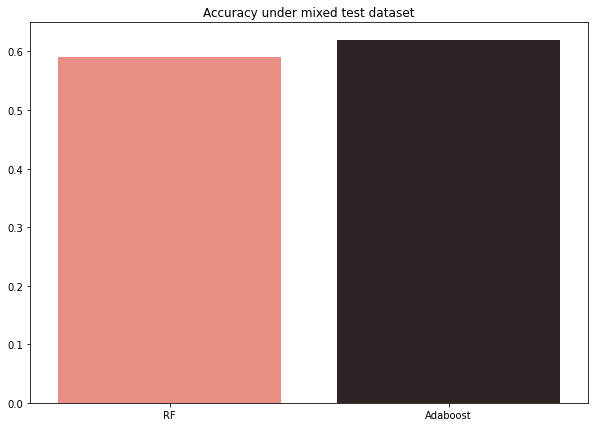

In [ ]:
figsize(10,7)
sns.barplot(x=['RF','Adaboost'], y = [acc_RF_new,acc_Adaboost_new],palette='dark:salmon_r')
plt.title("Accuracy under mixed test dataset")

# Cascade framework

In [ ]:
y = keras.utils.to_categorical(y_test_new, 2)
data = tf.concat([x_test_new,y],axis=1)
new_prediction = cond_gan.discriminator.predict(data)
new_prediction

array([[0.5358621 ],
       [0.50779533],
       [0.52528095],
       ...,
       [0.79594505],
       [0.79594505],
       [0.79594505]], dtype=float32)

In [ ]:
new_prediction = np.round(new_prediction).astype(int)
new_prediction

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
idx = np.where(new_prediction == 1)[0]
x_real_cascade = x_test_new[idx]
y_real_discriminator = np.ones(x_real_cascade.shape[0])

In [ ]:
y_pred_RF_cascade, y_pred_NB_cascade, y_pred_Adaboost_cascade,RF_cascade,NB_cascade,Adaboost_cascade =  model(x_train,y_train,x_real_cascade)

In [ ]:
acc_RF_cascade = accuracy(y_real_discriminator,y_pred_RF_cascade)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.95      0.98      3378

    accuracy                           0.95      3378
   macro avg       0.50      0.48      0.49      3378
weighted avg       1.00      0.95      0.98      3378



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc_Adaboost_cascade = accuracy(y_real_discriminator,y_pred_Adaboost_cascade)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.89      0.94      3378

    accuracy                           0.89      3378
   macro avg       0.50      0.45      0.47      3378
weighted avg       1.00      0.89      0.94      3378



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy under mixed test dataset')

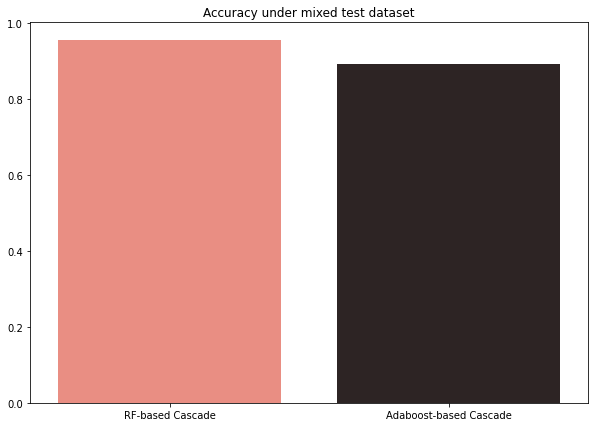

In [ ]:
figsize(10,7)
sns.barplot(x=['RF-based Cascade','Adaboost-based Cascade'], y = [acc_RF_cascade,acc_Adaboost_cascade],palette='dark:salmon_r')
plt.title("Accuracy under mixed test dataset")